In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')




In [5]:

data=pd.read_excel('cases.xls', parse_dates = ['Date'])
data

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,1
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,2
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,2
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4687,2020-08-06,Telangana,18.1124,79.0193,73050,589,52103,2092,0,1289
4688,2020-08-06,Tripura,23.9408,91.9882,5725,31,3793,97,0,68
4689,2020-08-06,Uttar Pradesh,26.8467,80.9462,104388,1857,60558,4078,0,3287
4690,2020-08-06,Uttarakhand,30.0668,79.0193,8254,98,5233,246,0,386


In [6]:
data.rename(columns={
    'Date' : 'date',
     'Name of State / UT' : 'country',
    'Total Confirmed cases' : 'confirmed',
    'New deaths' : 'deaths',
     'New recovered' : 'recovered'
    
}, inplace=True)
data


,date,country,Latitude,Longitude,confirmed,Death,Cured/Discharged/Migrated,New cases,deaths,recovered
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,1
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,2
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,2
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4687,2020-08-06,Telangana,18.1124,79.0193,73050,589,52103,2092,0,1289
4688,2020-08-06,Tripura,23.9408,91.9882,5725,31,3793,97,0,68
4689,2020-08-06,Uttar Pradesh,26.8467,80.9462,104388,1857,60558,4078,0,3287
4690,2020-08-06,Uttarakhand,30.0668,79.0193,8254,98,5233,246,0,386


In [7]:
data['active'] = data['confirmed'] - data['deaths'] - data['recovered']
data

,date,country,Latitude,Longitude,confirmed,Death,Cured/Discharged/Migrated,New cases,deaths,recovered,active
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0,1
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,1,0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,2,0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,2,1
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
4687,2020-08-06,Telangana,18.1124,79.0193,73050,589,52103,2092,0,1289,71761
4688,2020-08-06,Tripura,23.9408,91.9882,5725,31,3793,97,0,68,5657
4689,2020-08-06,Uttar Pradesh,26.8467,80.9462,104388,1857,60558,4078,0,3287,101101
4690,2020-08-06,Uttarakhand,30.0668,79.0193,8254,98,5233,246,0,386,7868


[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total Cases')]

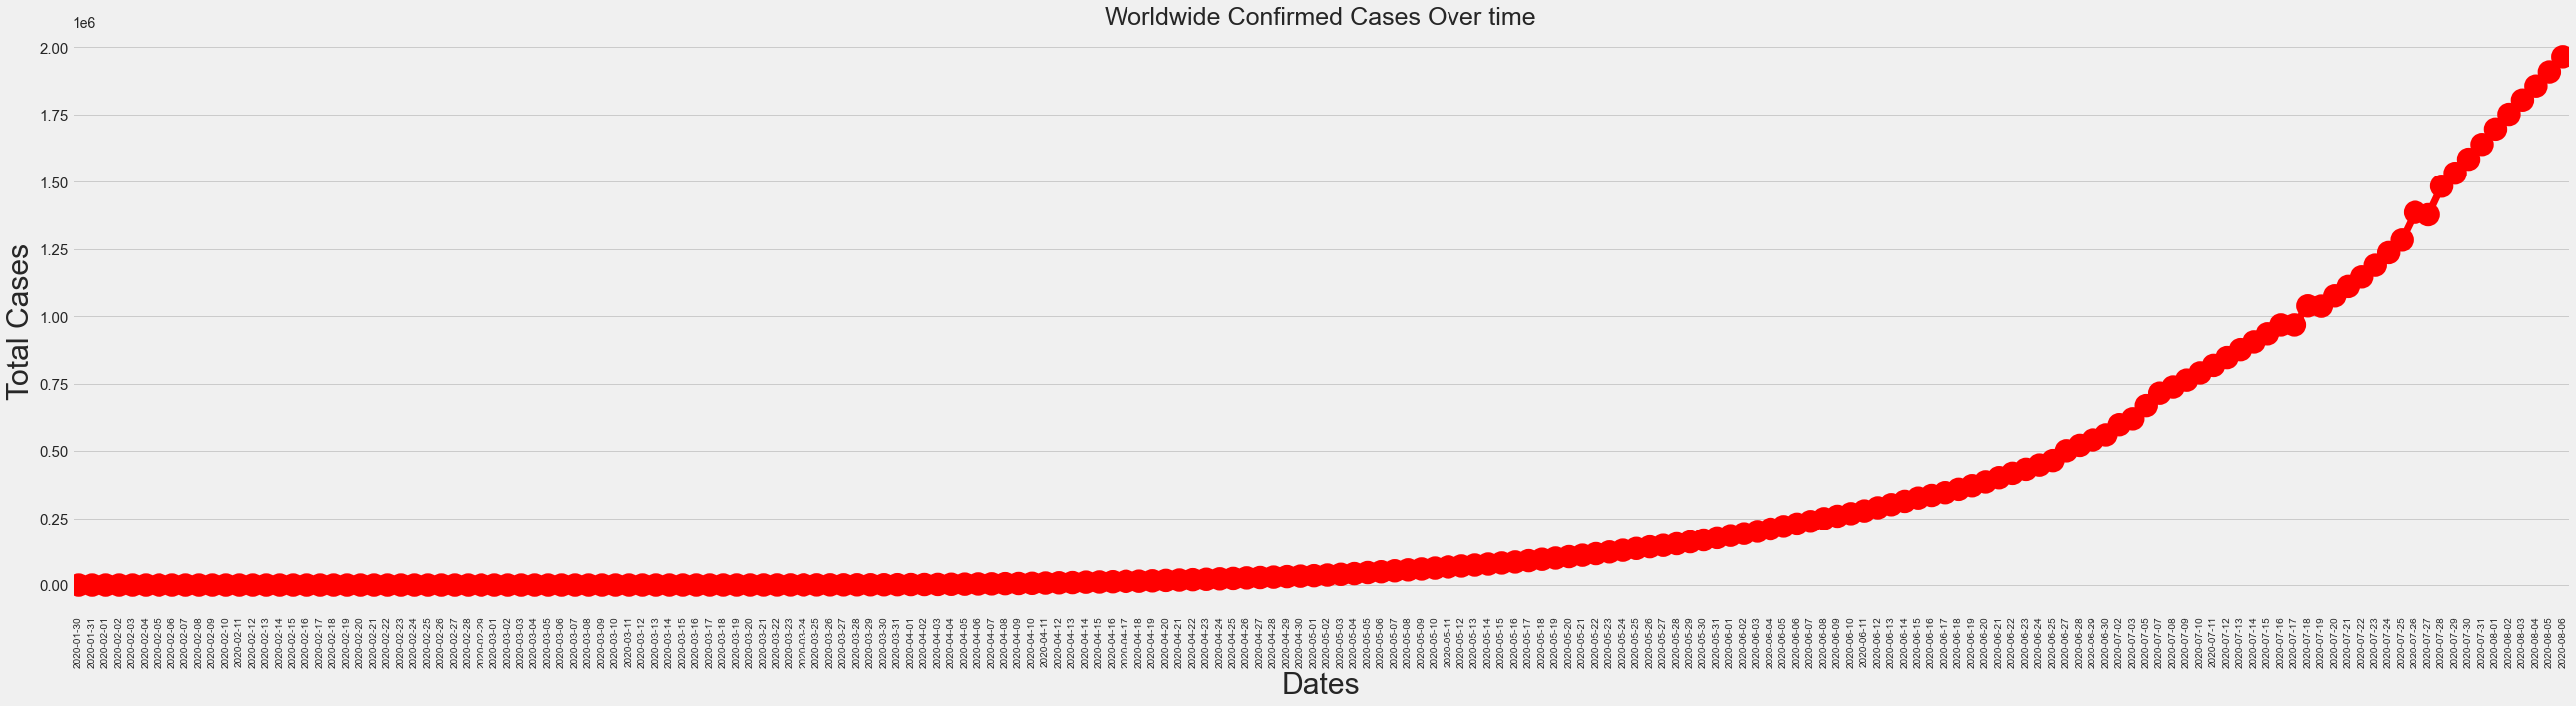

In [30]:
plt.figure(figsize=(40,10))
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel('Dates', fontsize=30)
plt.ylabel('Total Cases', fontsize=30)
plt.title('Worldwide Confirmed Cases Over time', fontsize=25)
total_cases = data.groupby('date')['date', 'confirmed'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])

ax = sns.pointplot(x = total_cases.date.dt.date, y = total_cases.confirmed, color = 'r') 
ax.set(xlabel="Dates", ylabel="Total Cases")

In [9]:
#Get Top Countries which have more active cases
top_actives = data.groupby(by = 'country')['active'].sum().sort_values(ascending = False).head(20).reset_index()


[Text(0.5, 0, 'Total Cases'), Text(0, 0.5, 'Country')]

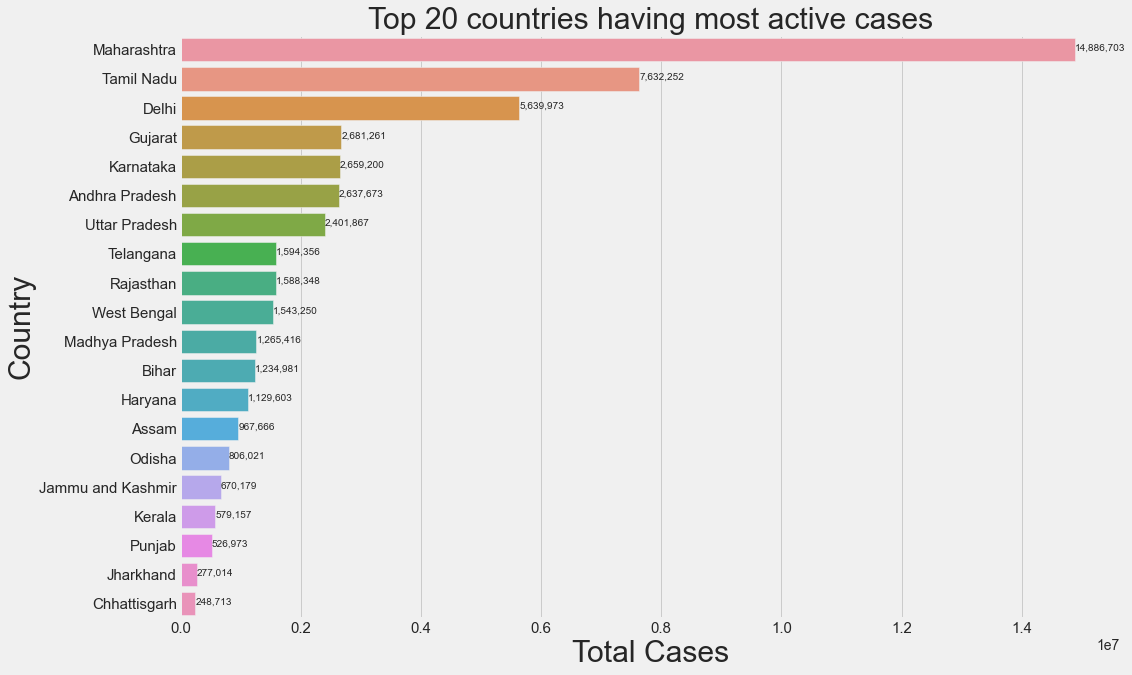

In [10]:
#Visualization of Top 20 Countries have Active Cases
plt.figure(figsize=(15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total Cases", fontsize = 30)
plt.ylabel('Country', fontsize = 30)
plt.title("Top 20 countries having most active cases", fontsize = 30)
ax = sns.barplot(x = top_actives.active, y = top_actives.country)
for i, (value, name) in enumerate(zip(top_actives.active, top_actives.country)):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha='left', va='center')
ax.set(xlabel='Total Cases', ylabel='Country')

In [11]:

data1= data.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
data1

,date,recovered,deaths,confirmed,active
0,2020-01-30,0,0,1,1
1,2020-01-31,1,0,1,0
2,2020-02-01,2,0,2,0
3,2020-02-02,2,0,3,1
4,2020-02-03,0,0,3,3
...,...,...,...,...,...
181,2020-08-02,51255,0,1750723,1699468
182,2020-08-03,40574,0,1803695,1763121
183,2020-08-04,44306,0,1855745,1811439
184,2020-08-05,51706,0,1908254,1856548


In [18]:
from prophet import Prophet

In [19]:

data2= data1.groupby(by='date')['confirmed'].sum().reset_index()

data2['date'] = pd.to_datetime(data2['date'])
data2

,date,confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
181,2020-08-02,1750723
182,2020-08-03,1803695
183,2020-08-04,1855745
184,2020-08-05,1908254


In [22]:
data2.columns = ['ds','y']
data2['ds'] = pd.to_datetime(data2['ds'])

In [23]:
model = Prophet()
model.fit(data2)
future = model.make_future_dataframe(periods=10)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
189,2020-08-10,1.880678e+06,1.819962e+06,1.936341e+06
190,2020-08-11,1.914391e+06,1.853769e+06,1.973290e+06
191,2020-08-12,1.947786e+06,1.886058e+06,2.009099e+06
192,2020-08-13,1.982313e+06,1.925093e+06,2.045723e+06
193,2020-08-14,2.003663e+06,1.944405e+06,2.063404e+06
194,2020-08-15,2.042379e+06,1.980441e+06,2.103268e+06
195,2020-08-16,2.075712e+06,2.011763e+06,2.144071e+06


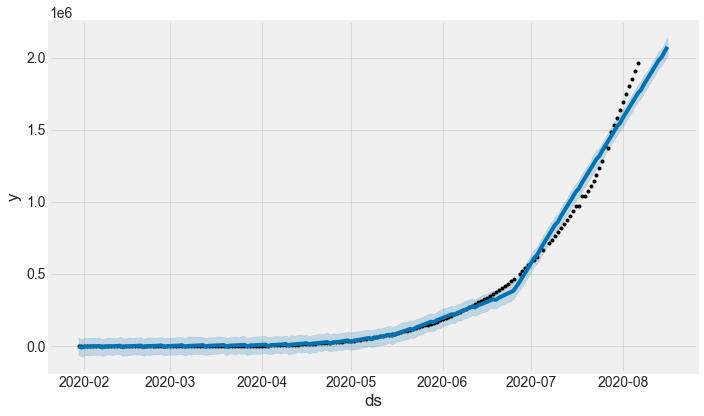

In [27]:
sl_confirmed_plot = model.plot(forecast)

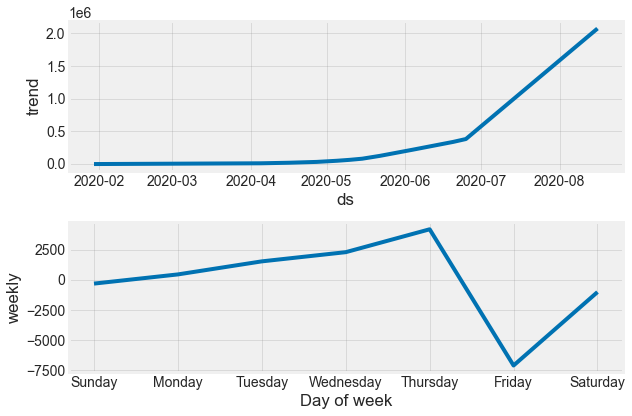

In [28]:
sl_confirmed_plot = model.plot_components(forecast)


In [33]:
import pickle
with open('casesprediction.pkl', 'wb') as file:
    pickle.dump(forecast, file)